# Part 1 - Model Training

This code looks at creating a linear classification algorithm, assessing if a tumor is malignent or benign. 

In [1]:
# We first verify the correct version of TF installed
# !pip install -q tensorflow-gpu==2.1.0

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

TensorFlow 2.x selected.
2.1.0


In [2]:
# Next, we load the data
data = load_breast_cancer()
print("Data Type:", type(data))
# The data is a Bunch objsect, meaning it is a dictionary, where the keys can be treated as atribus

Data Type: <class 'sklearn.utils.Bunch'>


In [3]:
data.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data.data.shape # the data.data reffers to the input data

(569, 30)

In [5]:
data.target.shape # the data.target reffers to the target/output data, a 1D array of 0s and 1s

(569,)

In [6]:
# These ar ethe names of the various inputs and feature
print(data.target_names)
print(data.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [0]:
# We split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [0]:
# We scale the data, to make sure the ranges/scales of all the inputs are similar.
# We substract the mean and divide by the standard deviation

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

N,D = X_train.shape

In [15]:
# This is where the model is created
# First, a model object is created. This is a Sequential-type object. 
# The object takes an input, which specifies the shape of the Input, while the Dense takes the input and does a linear transformation to get an output of sieze 1.

model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Input(shape=(D,)),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

# Alternativelly, we can also define the model (model2) as follows. This allows us to add layers.

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

# The next step is to compile the models.

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# Then, we train the two models

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200)
r2 = model2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200)

Train on 381 samples, validate on 188 samples
Epoch 1/200
381/381 [==============================] - 0s 928us/sample - loss: 1.0063 - accuracy: 0.4934 - val_loss: 0.8302 - val_accuracy: 0.5532
Epoch 2/200
381/381 [==============================] - 0s 140us/sample - loss: 0.9112 - accuracy: 0.5249 - val_loss: 0.7524 - val_accuracy: 0.5798
Epoch 3/200
381/381 [==============================] - 0s 136us/sample - loss: 0.8238 - accuracy: 0.5669 - val_loss: 0.6830 - val_accuracy: 0.6117
Epoch 4/200
381/381 [==============================] - 0s 146us/sample - loss: 0.7470 - accuracy: 0.6168 - val_loss: 0.6214 - val_accuracy: 0.6755
Epoch 5/200
381/381 [==============================] - 0s 134us/sample - loss: 0.6761 - accuracy: 0.6457 - val_loss: 0.5693 - val_accuracy: 0.6862
Epoch 6/200
381/381 [==============================] - 0s 133us/sample - loss: 0.6167 - accuracy: 0.6798 - val_loss: 0.5228 - val_accuracy: 0.7287
Epoch 7/200
381/381 [==============================] - 0s 132us/sample -

In [16]:
# We now evaluate the model

print("Model1:")
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

print("Model2:")
print("Train score:", model2.evaluate(X_train, y_train))
print("Test score:", model2.evaluate(X_test, y_test))

Model1:
381/381 [==============================] - 0s 68us/sample - loss: 0.0577 - accuracy: 0.9869
Train score: [0.05769141929669017, 0.98687667]
188/188 [==============================] - 0s 81us/sample - loss: 0.1085 - accuracy: 0.9681
Test score: [0.10848318183041633, 0.9680851]
Model2:
381/381 [==============================] - 0s 65us/sample - loss: 0.0578 - accuracy: 0.9869
Train score: [0.05784998660090714, 0.98687667]
188/188 [==============================] - 0s 93us/sample - loss: 0.1075 - accuracy: 0.9734
Test score: [0.10749210306304566, 0.9734042]


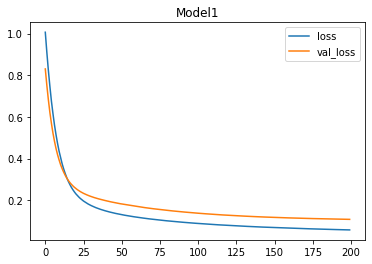

In [17]:
# The obtained accuracty is about 97% on both the train and test sets, for both models.
# We now plot what has been returned by the fit function, as weel as the accuracy.

# Plot what's returned by model.fit()
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Model1")
plt.legend()

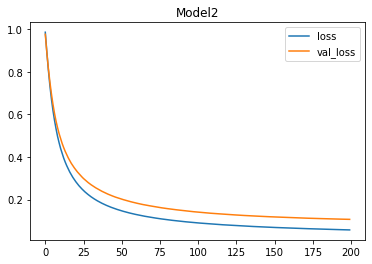

In [18]:
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.title("Model2")
plt.legend()

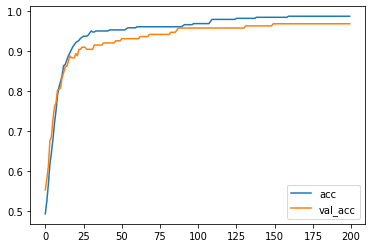

In [19]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

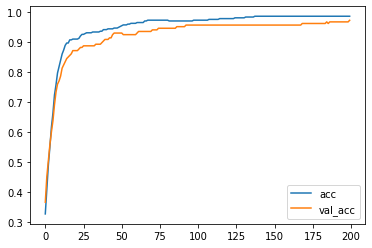

In [20]:

plt.plot(r2.history['accuracy'], label='acc')
plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()